# EDA 2

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from datetime import datetime, date, time

## Load data

In [9]:
data_folder='../data/'
df = pd.read_csv(data_folder + 'clean_complaint_data.csv', dtype={'CMPLNT_NUM': str})
pd.set_option('display.max_columns', None)
df.head()


/var/folders/gm/941r48zd5qxcl4tb3v9q30440000gn/T/ipykernel_8514/1503555543.py:2: DtypeWarning: Columns (18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_folder + 'clean_complaint_data.csv', dtype={'CMPLNT_NUM': str})


,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,BORO_NM,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,JURIS_DESC,JURISDICTION_CODE,PARKS_NM,HADEVELOPT,HOUSING_PSA,X_COORD_CD,Y_COORD_CD,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,geometry,District_Code,case_duration
0,39468181,2008-02-20,07:00:00,2008-02-23,08:00:00,88.0,2008-02-23,107,BURGLARY,221.0,"BURGLARY,RESIDENCE,DAY",COMPLETED,FELONY,BROOKLYN,INSIDE,RESIDENCE - APT. HOUSE,N.Y. POLICE DEPT,0,NaN,NaN,NaN,991818.0,191560.0,NaN,UNKNOWN,NaN,NaN,40.692464,-73.972708,"(40.692464, -73.972708)",PATROL BORO BKLYN NORTH,NaN,25-44,WHITE,F,POINT (-73.972708 40.692464),302.0,3.0
1,50539499,2008-08-21,22:00:00,2008-08-21,23:00:00,19.0,2008-08-22,109,GRAND LARCENY,438.0,"LARCENY,GRAND FROM BUILDING (NON-RESIDENCE) UN...",COMPLETED,FELONY,MANHATTAN,FRONT OF,BAR/NIGHT CLUB,N.Y. POLICE DEPT,0,NaN,NaN,NaN,997152.0,220300.0,NaN,NaN,NaN,NaN,40.771341,-73.953418,"(40.771341, -73.953418)",PATROL BORO MAN NORTH,NaN,45-64,WHITE HISPANIC,F,POINT (-73.953418 40.771341),108.0,0.0
2,45223390,2008-04-03,03:35:00,2008-04-03,03:50:00,77.0,2008-04-03,106,FELONY ASSAULT,109.0,"ASSAULT 2,1,UNCLASSIFIED",COMPLETED,FELONY,BROOKLYN,INSIDE,RESIDENCE - PUBLIC HOUSING,N.Y. HOUSING POLICE,2,NaN,NaN,3360.0,1004579.0,183837.0,NaN,NaN,NaN,NaN,40.671245,-73.926713,"(40.671245, -73.926713)",PATROL BORO BKLYN NORTH,NaN,25-44,BLACK,F,POINT (-73.926713 40.671245),308.0,0.0
3,50594658,2008-08-19,09:00:00,NaN,NaN,32.0,2008-08-27,341,PETIT LARCENY,349.0,"LARCENY,PETIT OF LICENSE PLATE",COMPLETED,MISDEMEANOR,MANHATTAN,FRONT OF,STREET,N.Y. POLICE DEPT,0,NaN,NaN,NaN,999965.0,235630.0,NaN,UNKNOWN,NaN,NaN,40.813412,-73.943226,"(40.813412, -73.943226)",PATROL BORO MAN NORTH,NaN,NaN,UNKNOWN,M,POINT (-73.943226 40.813412),110.0,inf
4,44451016,2008-03-10,22:00:00,2008-03-10,22:10:00,67.0,2008-03-11,105,ROBBERY,397.0,"ROBBERY,OPEN AREA UNCLASSIFIED",COMPLETED,FELONY,BROOKLYN,FRONT OF,STREET,N.Y. POLICE DEPT,0,NaN,NaN,NaN,999602.0,176145.0,<18,BLACK,M,NaN,40.650142,-73.944674,"(40.650142, -73.944674)",PATROL BORO BKLYN SOUTH,NaN,25-44,BLACK,M,POINT (-73.944674 40.650142),317.0,0.0


In [5]:
df_eco=pd.read_csv(data_folder+'eco_data.csv')
df_eco.head()

,District,Year,individuals_below_FPL,Employement_pop_ratio,District_Code
0,Astoria,2005,0.18347,0.593,401
1,Astoria,2006,0.17182,0.592,401
2,Astoria,2007,0.16717,0.603,401
3,Astoria,2008,0.16424,0.638,401
4,Astoria,2009,0.15914,0.608,401


## Crime number (by type) Vs eco

In [ ]:
df_eco_by_district = df_eco.groupby('District_Code').agg(
                    District = ('District', 'first'),
                    individuals_below_FPL_mean = ('individuals_below_FPL', 'mean'),
                    individuals_below_FPL_std = ('individuals_below_FPL', 'std'),
                    Employement_pop_ratio_mean = ('Employement_pop_ratio', 'mean'),
                    Employement_pop_ratio_std = ('Employement_pop_ratio', 'std'),
).reset_index()

df_eco_by_district.head()

,District_Code,District,individuals_below_FPL_mean,individuals_below_FPL_std,Employement_pop_ratio_mean,Employement_pop_ratio_std
0,101,Battery Park/Tribeca,0.080824,0.014476,0.695889,0.106929
1,102,Greenwich Village,0.080824,0.014476,0.703876,0.074474
2,103,Lower East Side,0.262436,0.024255,0.541882,0.016074
3,104,Chelsea/Clinton,0.131956,0.014030,0.690845,0.070434
4,105,Midtown Business District,0.125651,0.016527,0.677218,0.123798
5,106,Murray Hill/Stuyvesant,0.082991,0.015583,0.705118,0.014230
6,107,Upper West Side,0.101612,0.013348,0.657235,0.029838
7,108,Upper East Side,0.063247,0.013239,0.680706,0.019694
8,109,Manhattanville,0.259153,0.032618,0.554750,0.036382
9,110,Central Harlem,0.275878,0.032329,0.555063,0.038489


In [ ]:
crime_counts = df.groupby(['OFNS_DESC', 'District_Code']).size().reset_index(name='count')
crime_counts.head(10)

# merge the two dataframes on District_Code
df_merged = pd.merge(df_eco_by_district, crime_counts, on='District_Code', how='left')
df_merged.head()



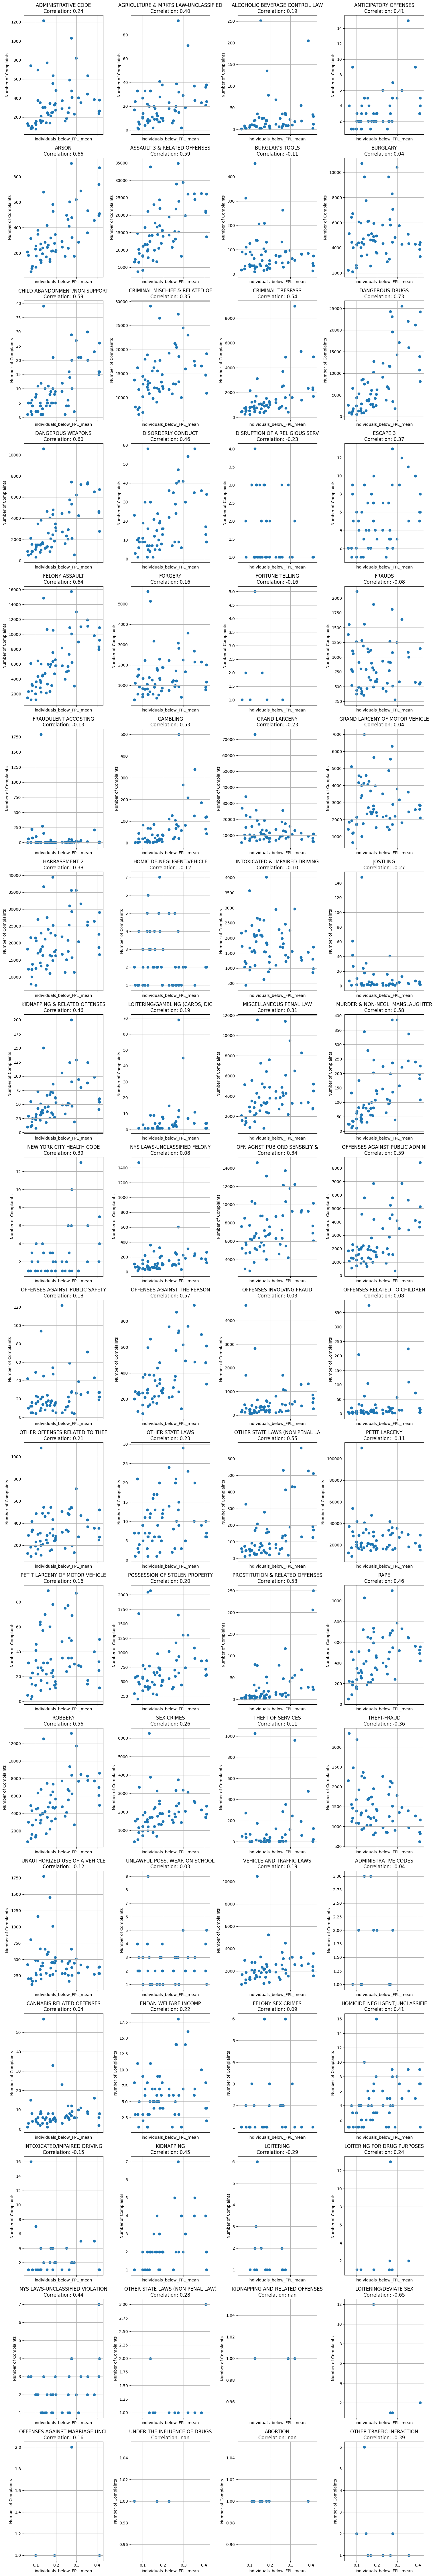

In [52]:
offense_types = df_merged['OFNS_DESC'].unique()
n_offenses = len(offense_types)

# Set up subplots
fig, axes = plt.subplots(18, 4, figsize=(15, 5 * 18), sharex=True)
axes = axes.flatten()  

# If only one offense type, axes isn't an array
if n_offenses == 1:
    axes = [axes]

# Plot each offense type in a separate subplot
for i, offense in enumerate(offense_types):
    subset = df_merged[df_merged['OFNS_DESC'] == offense]
    corr=subset['individuals_below_FPL_mean'].corr(subset['count'])
    axes[i].scatter(subset['individuals_below_FPL_mean'], subset['count'])
    axes[i].set_title(f"{offense}\nCorrelation: {corr:.2f}")
    axes[i].set_xlabel('individuals_below_FPL_mean')
    axes[i].set_ylabel('Number of Complaints')
    axes[i].grid(True)

plt.tight_layout()
plt.show()

